# 2 - Project plan and EDA

### What will be check during EDA?

###### Below is the distribution of variables and their comparison to the Target and Amount Credit:
- Gender <br>
- Family Status <br>
- Age <br>
- Own Real Estate <br>
- Own Car <br>
- Occupation types <br>
- Education and Housing types <br>
- Income vs Default<br>
- Credit amount vs Default<br>

##### Other things to be checked
- Default ratios for more and less complete aplications.<br>
- Previous credits from credit bureau (number of previous credits a client had in credit bureau) ALL vs ACTIVE<br>
- Average days between current and last Credit Bureau credit application <br>
- Previous applications for home credit loans (applied/final credit/ difference) default vs non-default
- Credit types vs default rate<br>
- Average terms for previous credit in home credit (Term of previous credit / installments left) default vs non-default<br> 
- Previous applications ( difference between applied and received credit) default vs non-default <br>
- Average credit card balance before application date<br>

### Hypotheses to check during statistical inference

- People who own a car or/and House default less <br>
- People over 60 default less <br>
- Any statistical significance that some exact day / hour applications tend to default more? <br>
- People with a higher education would default less <br>
- People who lives in higher rating city/region default less<br>
- People who lives in higher rating city/region earns more<br>
- There is a significant difference in credit amount when comparing different city/region ratings<br>
- There is a significant difference in credit amount when comparing housing types<br>
- People with incomplete application defaults more often 

### What Features I will create?
##### Bureau and Bureau_Balance

###### Previous_applications

###### Credit Card Balance

##### Instalment Payments

##### Pos Cash

##### Application

### What models I will create?

- Default prediction 
- Early repayment behavior
- Level of early repayment (0-2)

#### Required modules

In [1]:
import os
import sys
from pathlib import Path

sys.path.append(str(Path(os.getcwd()).parent.absolute()) + "\\app")

In [1]:
import pandas as pd
from functions_visualization import *
from functions import *

%load_ext nb_black

<IPython.core.display.Javascript object>

#### Setting access to reach GCP bucket

In [38]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = config.GOOGLE_APPLICATION_CREDENTIALS

<IPython.core.display.Javascript object>

#### Importing data

In [39]:
application_test = pd.read_csv(f"{config.DATA_DIRECTORY}application_test.csv")
application_train = pd.read_csv(f"{config.DATA_DIRECTORY}application_train.csv")
bureau = pd.read_csv(f"{config.DATA_DIRECTORY}bureau.csv")
bureau_balance = pd.read_csv(f"{config.DATA_DIRECTORY}bureau_balance.csv")
credit_card_balance = pd.read_csv(f"{config.DATA_DIRECTORY}credit_card_balance.csv")
installments_payments = pd.read_csv(f"{config.DATA_DIRECTORY}installments_payments.csv")
pos_cash_balance = pd.read_csv(f"{config.DATA_DIRECTORY}POS_CASH_balance.csv")
previous_application = pd.read_csv(f"{config.DATA_DIRECTORY}previous_application.csv")

<IPython.core.display.Javascript object>

##### Gender

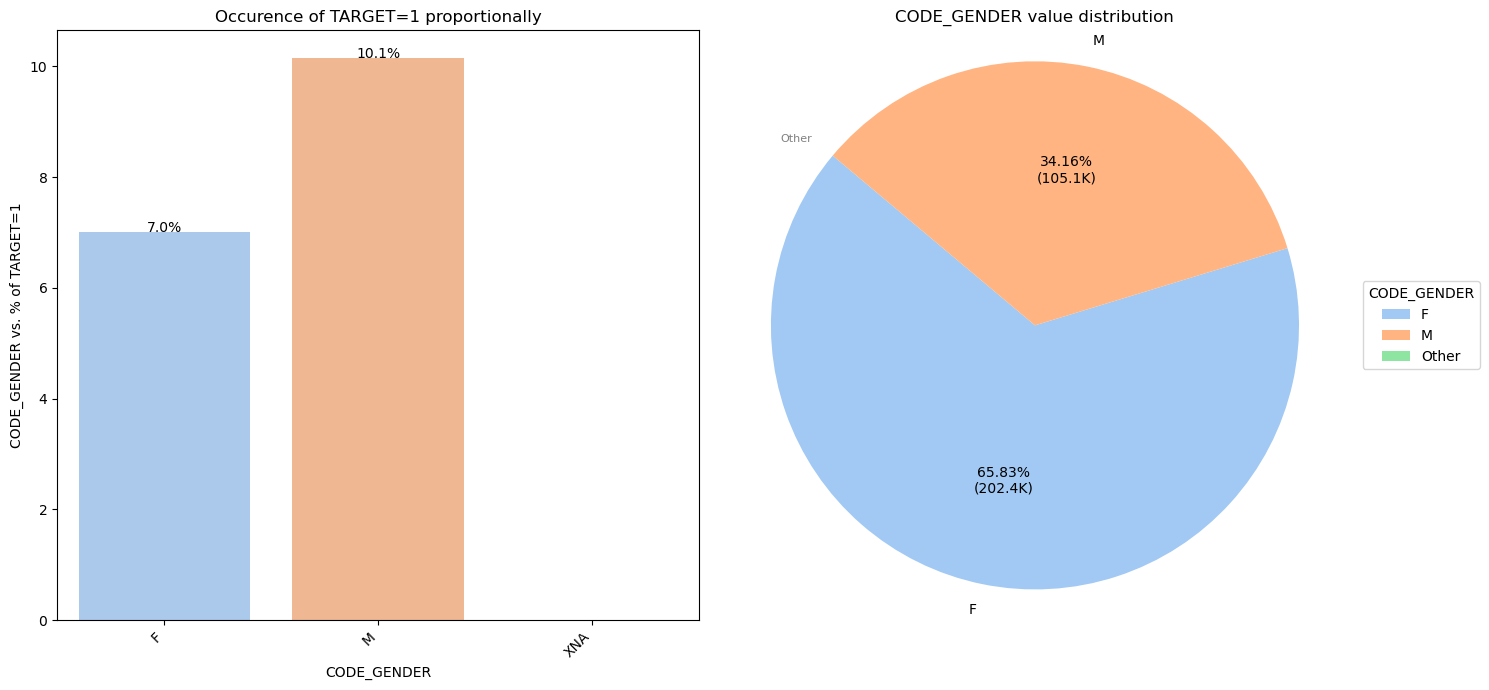

<IPython.core.display.Javascript object>

In [3]:
plot_categorical_distribution(application_train, "CODE_GENDER", "TARGET")

Although the dataset primarily comprises female applicants (66% vs. 34% male), interestingly, men tend to default more often, with default rates of 7% for females and 10% for males.

##### Family_Status

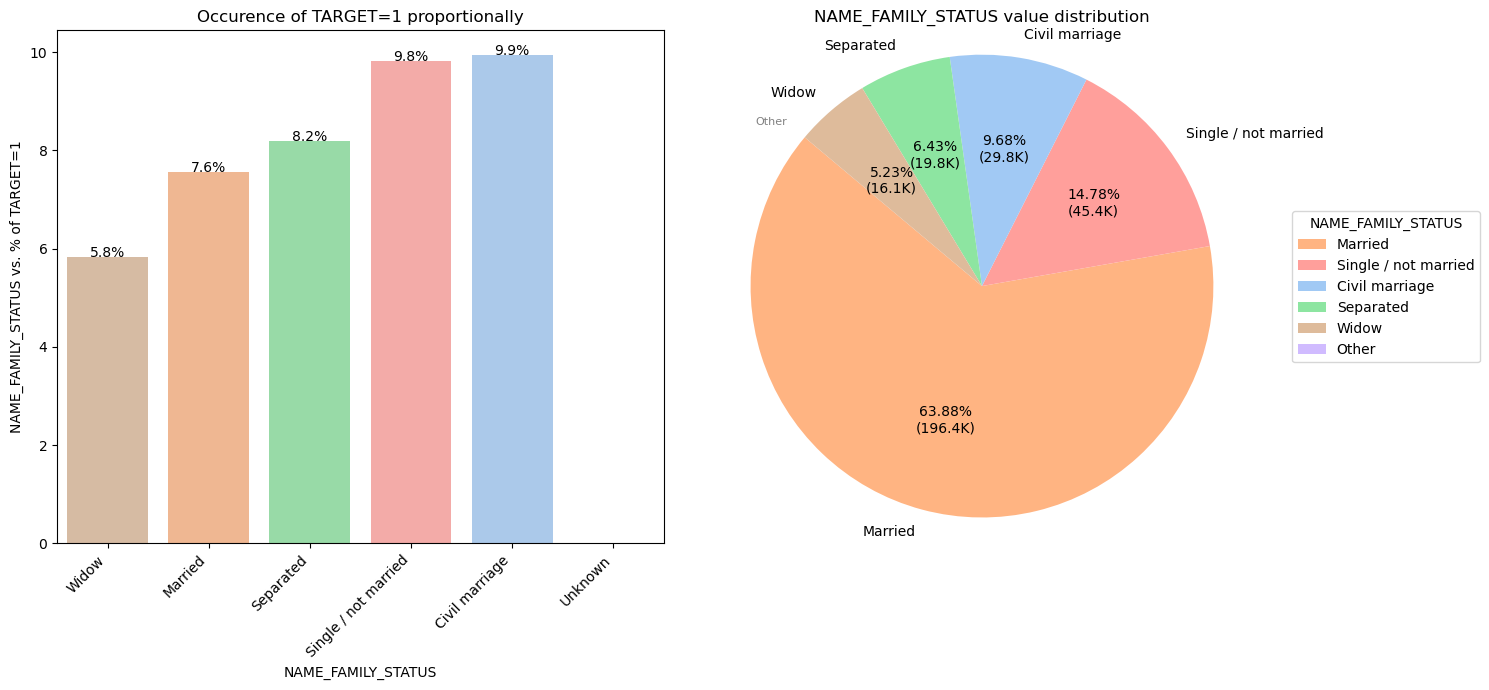

<IPython.core.display.Javascript object>

In [4]:
plot_categorical_distribution(application_train, "NAME_FAMILY_STATUS", "TARGET")

Civil marriages, single individuals, and those who are separated tend to default more frequently compared to widowed or married individuals. It's noteworthy that over half of the applicants in this dataset are married.

##### Age

In [5]:
application_train["YEARS_BIRTH"] = application_train["DAYS_BIRTH"] / (-365)

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

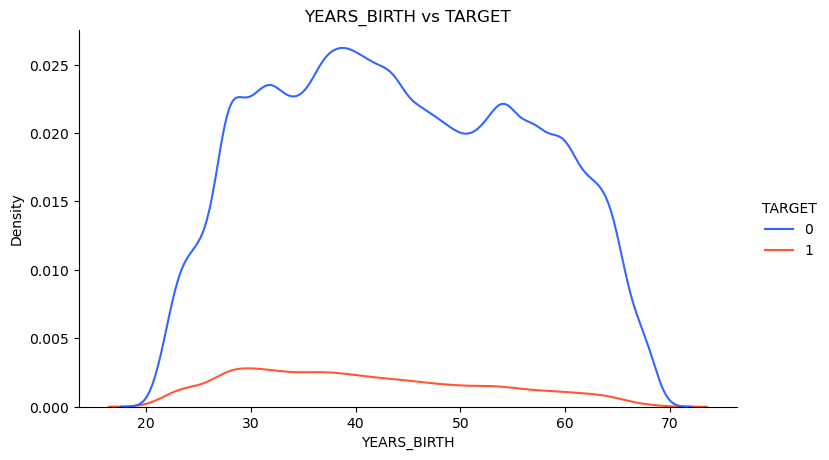

<IPython.core.display.Javascript object>

In [6]:
plot_num_vs_binary(application_train, "YEARS_BIRTH", "TARGET")

We can see that people around the age of 30 defaults the most, and older people tends to default less. We will check if we can prove it statistically. During the modelling, I will also create age bins 0/25/40/60+.

##### Own Real Estate

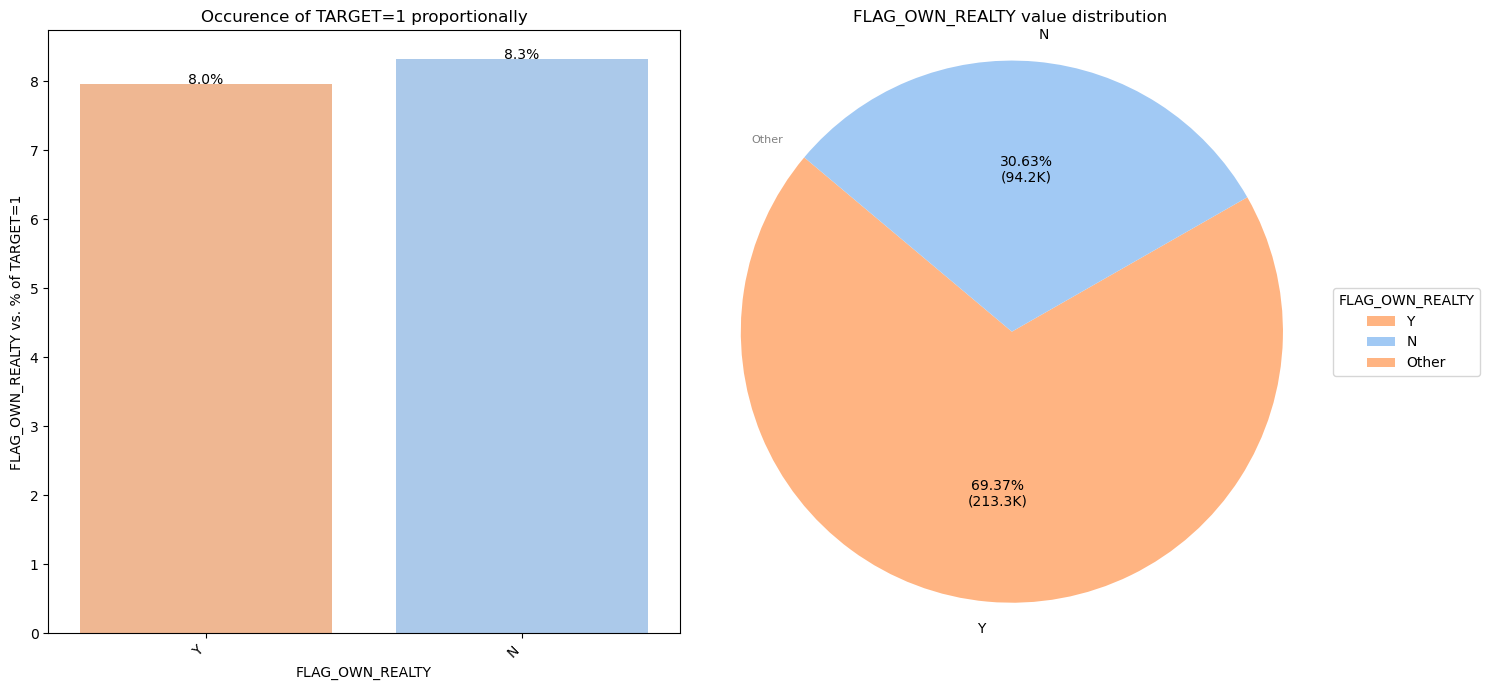

<IPython.core.display.Javascript object>

In [7]:
plot_categorical_distribution(application_train, "FLAG_OWN_REALTY", "TARGET")

The majority of people in this dataset own real estate. However, we can't see a big difference in % of defaults between these groups.

##### Own Car

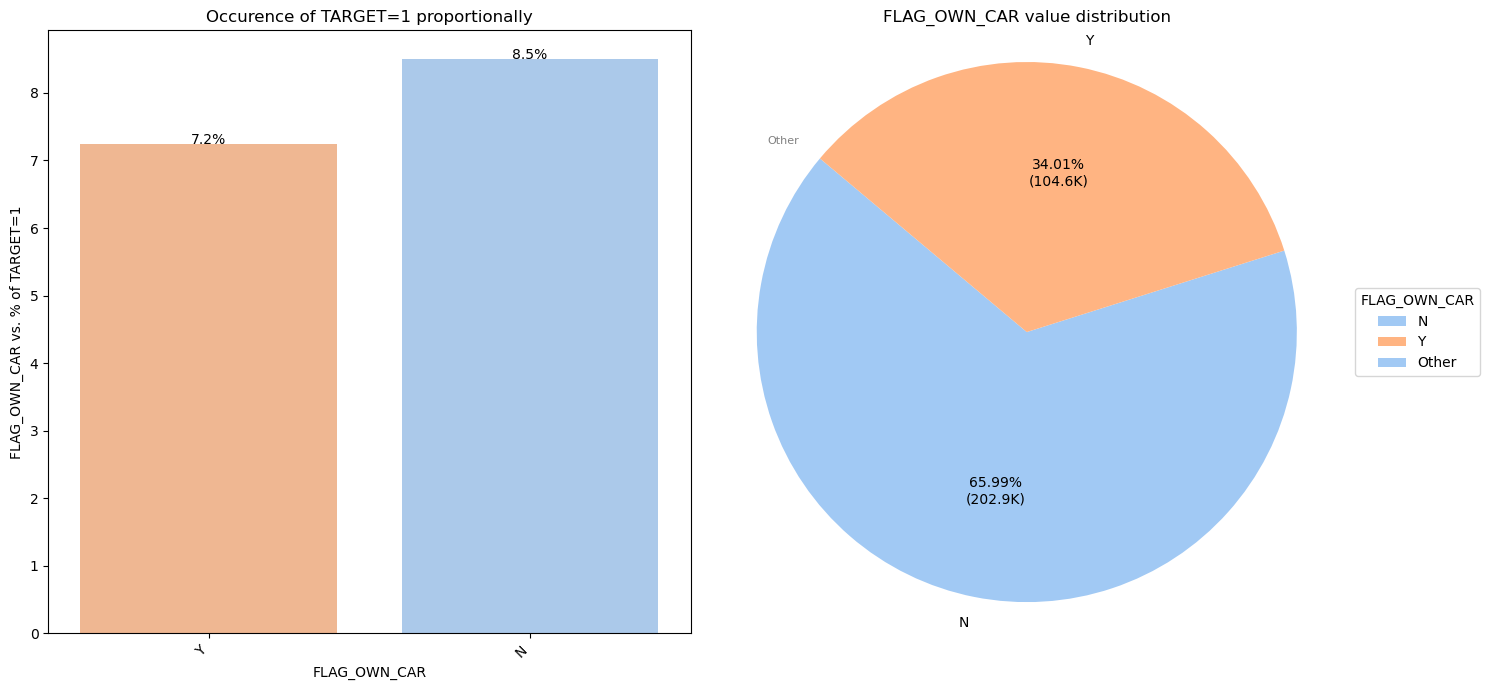

<IPython.core.display.Javascript object>

In [8]:
plot_categorical_distribution(application_train, "FLAG_OWN_CAR", "TARGET")

An interesting population in this sample. Most of the people do own real yestate, but do not own a car. Furthermore - people who do not own a car defaults by 1.3% more often. We will check if this difference is statistically significant.

##### Occupation Type

In [9]:
temp_df_occ = application_train[["OCCUPATION_TYPE", "TARGET"]].copy()
temp_df_occ.dropna(inplace=True)

<IPython.core.display.Javascript object>

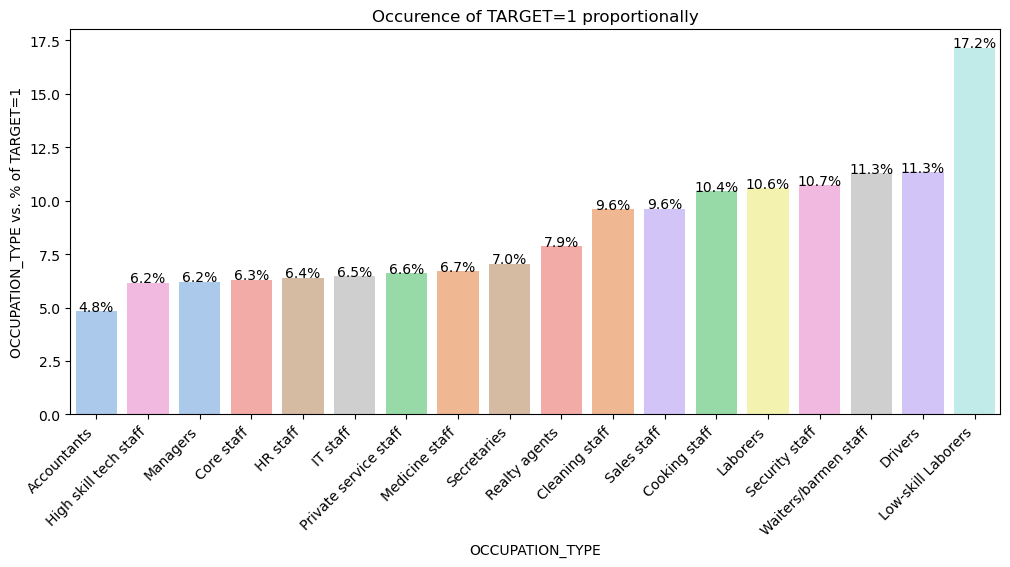

<IPython.core.display.Javascript object>

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))

unique_categories = temp_df_occ["OCCUPATION_TYPE"].unique()
palette = sns.color_palette("pastel", len(unique_categories))
color_map = {
    category: color for category, color in zip(sorted(unique_categories), palette)
}

categorical_to_proportion_of_target(
    ax, temp_df_occ, "OCCUPATION_TYPE", "TARGET", color_map
)

Low skill laborers have a highest % of default ratio (17.2%) followed by Drivers, Waiters/Barmens, security staff, Laborers, Cooking staff (10.4% - 11.3%). Occupations that require more educational background and work experience have the lowest default rates.

##### Housing Type

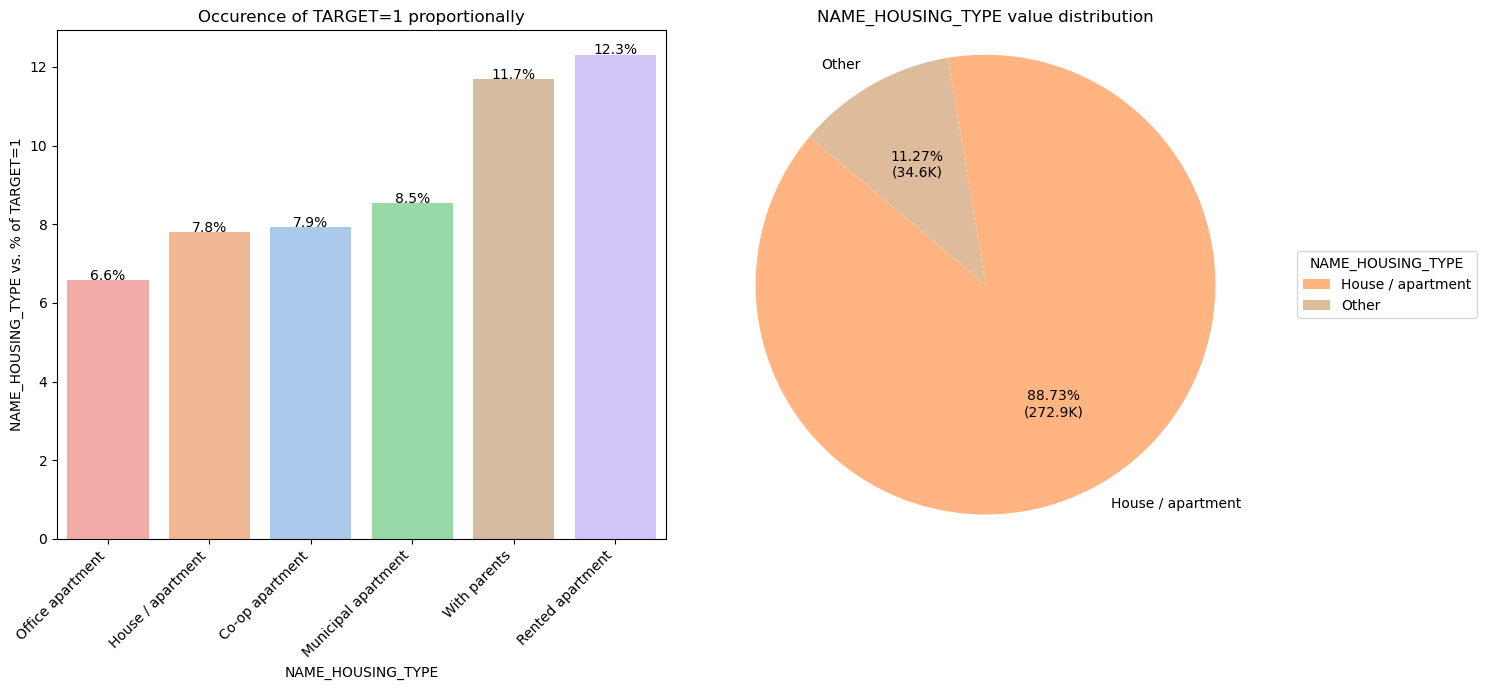

<IPython.core.display.Javascript object>

In [11]:
plot_categorical_distribution(application_train, "NAME_HOUSING_TYPE", "TARGET")

On the Pie chart "Other" is only marked if this category is less than 3% of all values.

Almost all applicants have a housing type listed as 'House/apartment'. Interestingly, individuals who are renting apartments or living with parents tend to default most often. However, it's important to note that these applicants represent only a small percentage of the dataset population.

##### Education Type

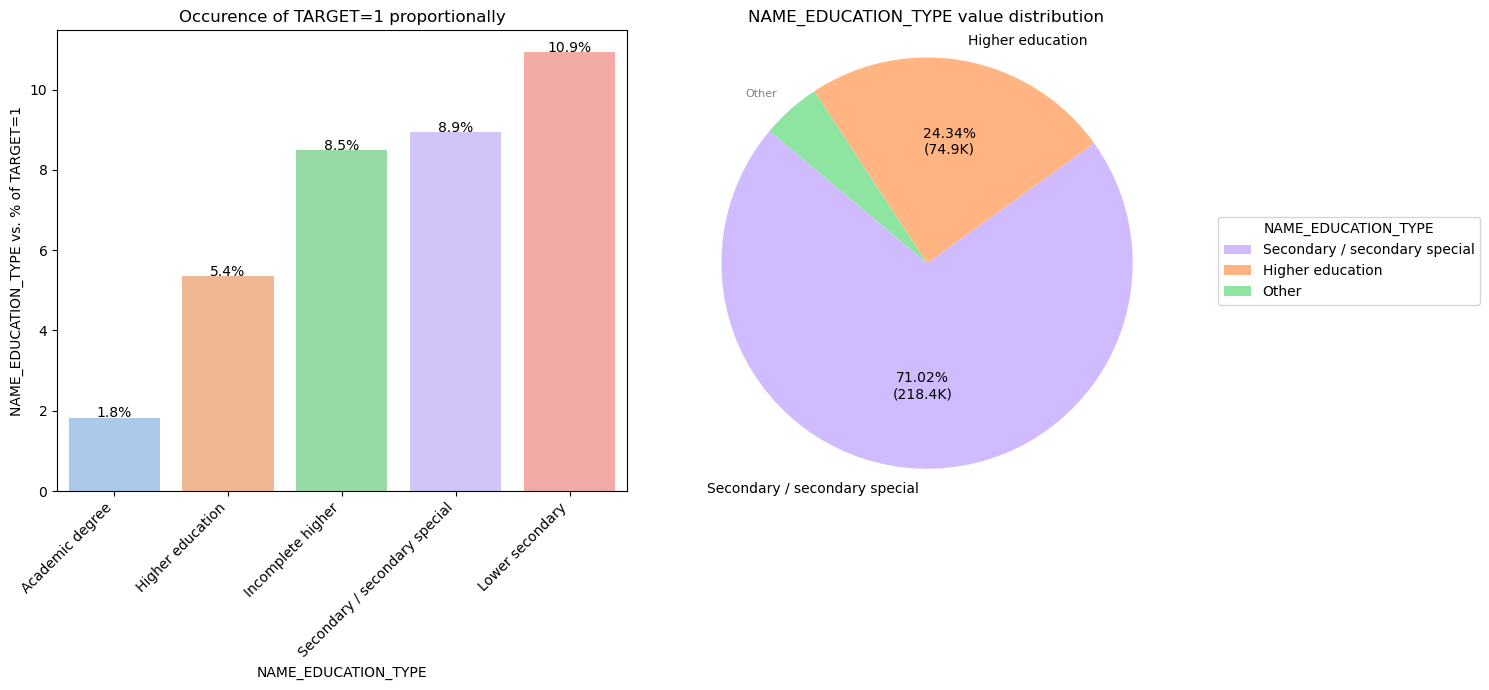

<IPython.core.display.Javascript object>

In [12]:
plot_categorical_distribution(application_train, "NAME_EDUCATION_TYPE", "TARGET")

71% of applicants in this dataset do have secondary education, 24% - Higher education. People with lower secondary defaults most often, however there are very little of them. 

##### Income

<Figure size 640x480 with 0 Axes>

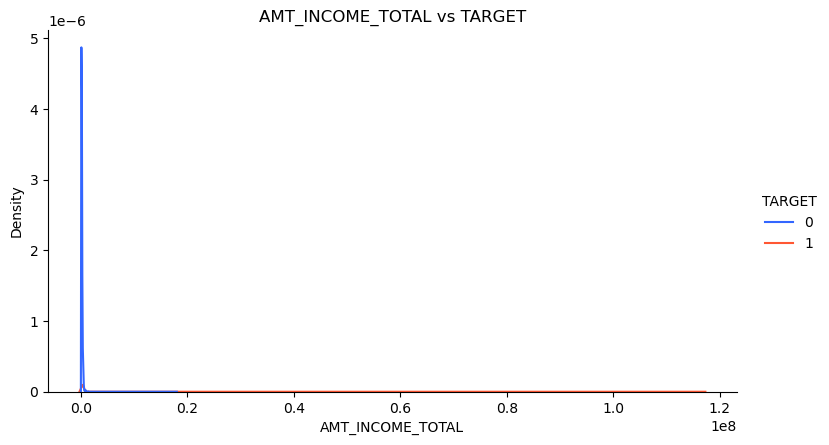

<IPython.core.display.Javascript object>

In [13]:
plot_num_vs_binary(application_train, "AMT_INCOME_TOTAL", "TARGET")

Right now we can't see anything about this distribution because of the outliers, let's remove them.

In [14]:
temp_df_inc = application_train[["AMT_INCOME_TOTAL", "TARGET"]].copy()
temp_df_inc = remove_outliers(temp_df_inc, "AMT_INCOME_TOTAL")

Old Shape:  (307511, 2)
New Shape:  (293476, 2)
Values dropped: 14035


<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

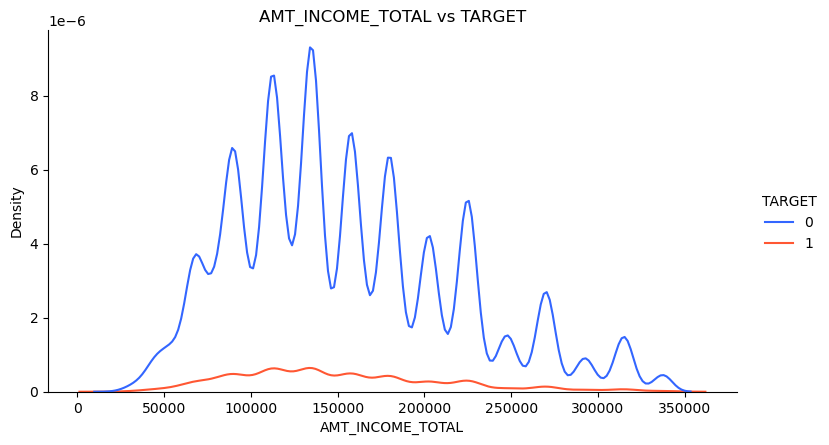

<IPython.core.display.Javascript object>

In [15]:
plot_num_vs_binary(temp_df_inc, "AMT_INCOME_TOTAL", "TARGET")

Old Shape:  (307511, 2)
New Shape:  (300949, 2)
Values dropped: 6562


<Figure size 640x480 with 0 Axes>

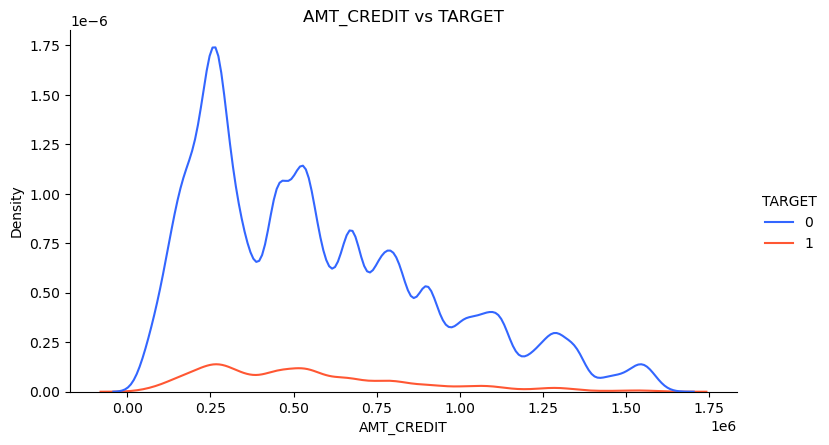

<IPython.core.display.Javascript object>

In [16]:
temp_df_credit = application_train[["AMT_CREDIT", "TARGET"]].copy()
temp_df_credit = remove_outliers(temp_df_credit, "AMT_CREDIT")
plot_num_vs_binary(temp_df_credit, "AMT_CREDIT", "TARGET")

I can't see anything very unusual between these groups. The peaks of the distributions for defaults are lower and less spread out, suggesting lower income and credit amounts compared to non-defaults. We will analyze more AMT_CREDIT and AMT_INCOME_TOTAL variable compared to other categorical features during statistical analysis.

#### Comparison between complete and incomplete application

In [18]:
application_train["incomplete"] = 1
application_train.loc[application_train.isnull().sum(axis=1) < 35, "incomplete"] = 0

mean_c = np.mean(
    application_train.loc[application_train["incomplete"] == 0, "TARGET"].values
)
mean_i = np.mean(
    application_train.loc[application_train["incomplete"] == 1, "TARGET"].values
)

<IPython.core.display.Javascript object>

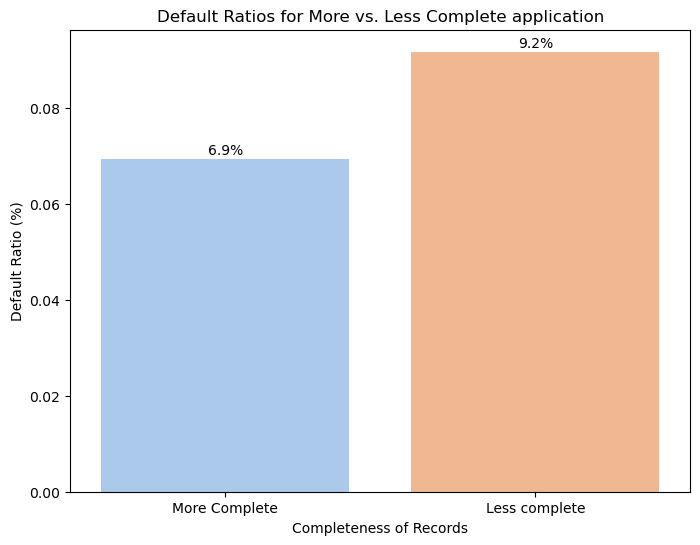

<IPython.core.display.Javascript object>

In [19]:
ratios = [mean_c, mean_i]
names = ["More Complete", "Less complete"]

plt.figure(figsize=(8, 6))
sns.barplot(x=names, y=ratios, palette="pastel")
plt.title("Default Ratios for More vs. Less Complete application")
plt.ylabel("Default Ratio (%)")
plt.xlabel("Completeness of Records")

for i, value in enumerate(ratios):
    plt.text(i, value + max(ratios) * 0.01, f"{value:.1%}", ha="center")

plt.show()

Less complete have a higher default ratio (9.2%) compared to more complete applications (6.9%). Completeness of the application might be an indicator of default risk.

### EDA info from Credit_Bureau

In [20]:
mrg_appl_bureau = bureau.merge(
    application_train[["SK_ID_CURR", "TARGET"]], on="SK_ID_CURR"
)

<IPython.core.display.Javascript object>

#### Number of previous loans an applicant had

In [21]:
total_default = (
    mrg_appl_bureau[["SK_ID_CURR", "CREDIT_ACTIVE"]][mrg_appl_bureau["TARGET"] == 1]
    .groupby("SK_ID_CURR")
    .count()
    .mean()
)

total_nondefault = (
    mrg_appl_bureau[["SK_ID_CURR", "CREDIT_ACTIVE"]][mrg_appl_bureau["TARGET"] == 0]
    .groupby("SK_ID_CURR")
    .count()
    .mean()
)

active_default = (
    mrg_appl_bureau[["SK_ID_CURR", "CREDIT_ACTIVE"]][
        (mrg_appl_bureau["TARGET"] == 1)
        & (mrg_appl_bureau["CREDIT_ACTIVE"] == "Active")
    ]
    .groupby("SK_ID_CURR")
    .count()
    .mean()
)

active_nondefault = (
    mrg_appl_bureau[["SK_ID_CURR", "CREDIT_ACTIVE"]][
        (mrg_appl_bureau["TARGET"] == 0)
        & (mrg_appl_bureau["CREDIT_ACTIVE"] == "Active")
    ]
    .groupby("SK_ID_CURR")
    .count()
    .mean()
)

data = {
    "all": {
        "default": total_default.values[0],
        "non-default": total_nondefault.values[0],
    },
    "active": {
        "default": active_default.values[0],
        "non-default": active_nondefault.values[0],
    },
}

<IPython.core.display.Javascript object>

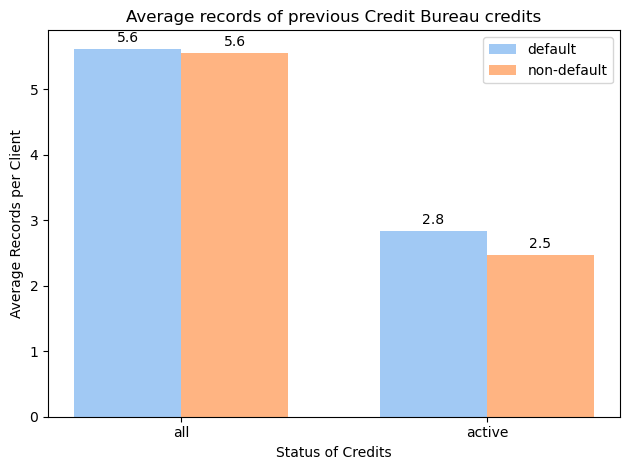

<IPython.core.display.Javascript object>

In [22]:
categories = list(data.keys())
default_values = [data[cat]["default"] for cat in categories]
nondefault_values = [data[cat]["non-default"] for cat in categories]

colors = sns.color_palette("pastel", 2)
bar_width = 0.35
x = np.arange(len(categories))

fig, ax = plt.subplots()

bars_default = ax.bar(
    x - bar_width / 2, default_values, bar_width, label="default", color=colors[0]
)
bars_nondefault = ax.bar(
    x + bar_width / 2,
    nondefault_values,
    bar_width,
    label="non-default",
    color=colors[1],
)

ax.set_xlabel("Status of Credits")
ax.set_ylabel("Average Records per Client")
ax.set_title("Average records of previous Credit Bureau credits")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            "{}".format(round(height, 1)),
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


add_value_labels(bars_default)
add_value_labels(bars_nondefault)

plt.tight_layout()
plt.show()

For both defaulters and non-defaulters, the average number of records is the same when considering all credits (5.6 each). However, when looking at only active credits, the average for defaulters (2.8) is slightly higher than for non-defaulters (2.5). This suggests that clients who defaulted have, on average, more active credit bureau records than those who did not default.

#### How many days passed between current and last loan application?

In [23]:
days_btwn_default = abs(
    mrg_appl_bureau[["SK_ID_CURR", "DAYS_CREDIT"]][mrg_appl_bureau["TARGET"] == 1]
    .groupby("SK_ID_CURR")
    .max()
    .mean()
)

days_btwn_nondefault = abs(
    mrg_appl_bureau[["SK_ID_CURR", "DAYS_CREDIT"]][mrg_appl_bureau["TARGET"] == 0]
    .groupby("SK_ID_CURR")
    .max()
    .mean()
)

<IPython.core.display.Javascript object>

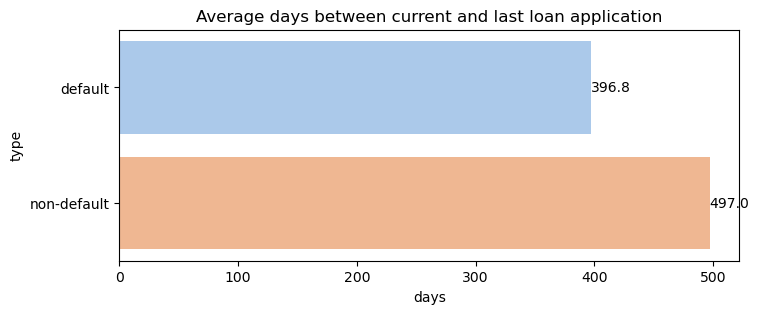

<IPython.core.display.Javascript object>

In [24]:
data = pd.DataFrame(
    {
        "type": ["default", "non-default"],
        "days": [days_btwn_default.values[0], days_btwn_nondefault.values[0]],
    }
)
colors = sns.color_palette("pastel", 2)

plt.figure(figsize=(8, 3))
plt.title("Average days between current and last loan application")

ax = sns.barplot(y="type", x="days", data=data, palette=colors)

for p in ax.patches:
    ax.text(
        p.get_width(),
        p.get_y() + p.get_height() / 2,
        "{:.1f}".format(p.get_width()),
        va="center",
    )
plt.show()

The non-defaulting clients have a higher average number of days between applications (497.0 days), indicating they wait longer between loan applications compared to defaulting clients, who have an average of 396.8 days. This could imply that non-defaulters are more cautious or have less frequent need for new loans.

#### Default possibilities per loan type

In [25]:
type_perc_default = mrg_appl_bureau[["SK_ID_CURR", "CREDIT_TYPE"]][
    mrg_appl_bureau["TARGET"] == 1
].groupby("CREDIT_TYPE").count() / len(
    mrg_appl_bureau[["SK_ID_CURR", "CREDIT_TYPE"]][mrg_appl_bureau["TARGET"] == 1]
)

type_perc_nondefault = round(
    mrg_appl_bureau[["SK_ID_CURR", "CREDIT_TYPE"]][mrg_appl_bureau["TARGET"] == 0]
    .groupby("CREDIT_TYPE")
    .count()
    / len(
        mrg_appl_bureau[["SK_ID_CURR", "CREDIT_TYPE"]][mrg_appl_bureau["TARGET"] == 0]
    ),
    6,
)

type_perc_ratio = type_perc_default / type_perc_nondefault

<IPython.core.display.Javascript object>

In [26]:
type_perc_ratio.dropna(inplace=True)
type_perc_ratio.sort_values(by=["SK_ID_CURR"], inplace=True)
type_perc_ratio = type_perc_ratio.rename(
    index={
        "Cash loan (non-earmarked)": "Cash loan",
        "Loan for business development": "Business development",
        "Loan for the purchase of equipment": "Purchase of equipment",
        "Loan for working capital replenishment": "Working capital replenishment",
    }
)
type_perc_ratio = type_perc_ratio["SK_ID_CURR"].squeeze()

<IPython.core.display.Javascript object>

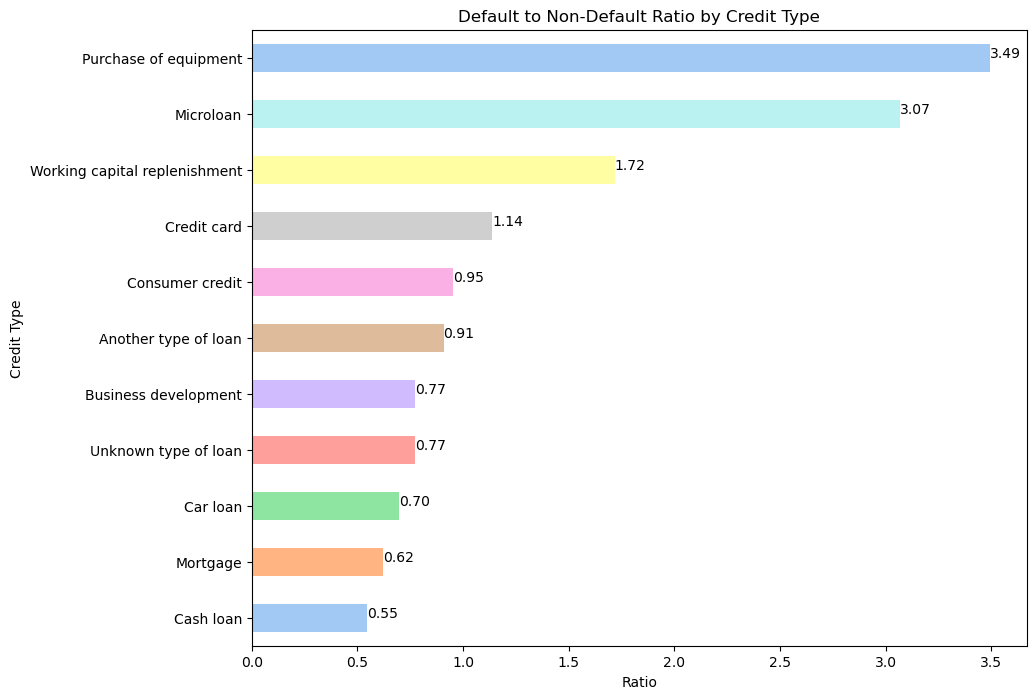

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(10, 8))
color = sns.color_palette("pastel")
type_perc_ratio.plot(kind="barh", color=color)

plt.title("Default to Non-Default Ratio by Credit Type")
plt.xlabel("Ratio")
plt.ylabel("Credit Type")

for index, value in enumerate(type_perc_ratio):
    plt.text(value, index, f"{value:.2f}")

plt.show()

The Purchase of equipment has the highest default to non-default ratio at 3.49, indicating a higher likelihood of default in this category. Microloans follow with a ratio of 3.07. Meanwhile, cash loans have the lowest ratio of 0.55, suggesting they are the safest credit type in terms of default risk. 

#### Term of previous loans and how many installments are left?

In [28]:
mrg_appl_pcash = pos_cash_balance.merge(
    application_train[["SK_ID_CURR", "TARGET"]], on="SK_ID_CURR"
)

<IPython.core.display.Javascript object>

In [29]:
term_default = mrg_appl_pcash[["CNT_INSTALMENT"]][
    (mrg_appl_pcash["TARGET"] == 1) & (mrg_appl_pcash["MONTHS_BALANCE"] == -1)
].mean()

term_nondefault = mrg_appl_pcash[["CNT_INSTALMENT"]][
    (mrg_appl_pcash["TARGET"] == 0) & (mrg_appl_pcash["MONTHS_BALANCE"] == -1)
].mean()

instl_left_default = mrg_appl_pcash[["CNT_INSTALMENT_FUTURE"]][
    (mrg_appl_pcash["TARGET"] == 1) & (mrg_appl_pcash["MONTHS_BALANCE"] == -1)
].mean()

instl_left_nondefault = mrg_appl_pcash[["CNT_INSTALMENT_FUTURE"]][
    (mrg_appl_pcash["TARGET"] == 0) & (mrg_appl_pcash["MONTHS_BALANCE"] == -1)
].mean()

<IPython.core.display.Javascript object>

In [30]:
term_and_installments = {
    "Term of previous loan": {
        "default": term_default.values[0],
        "non-default": term_nondefault.values[0],
    },
    "Installments left": {
        "default": instl_left_default.values[0],
        "non-default": instl_left_nondefault.values[0],
    },
}

<IPython.core.display.Javascript object>

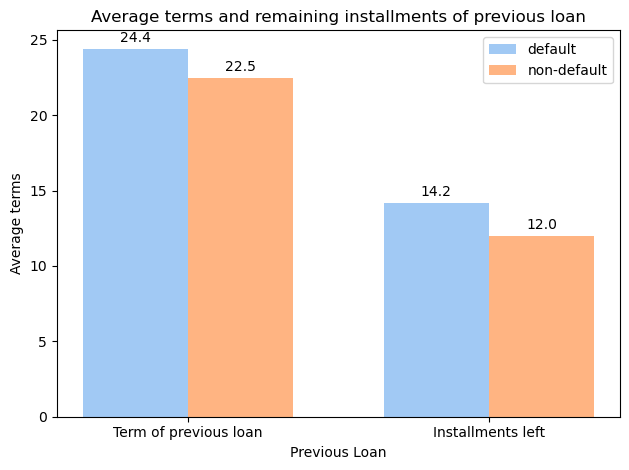

<IPython.core.display.Javascript object>

In [31]:
categories = list(term_and_installments.keys())
default_values = [term_and_installments[cat]["default"] for cat in categories]
nondefault_values = [term_and_installments[cat]["non-default"] for cat in categories]

colors = sns.color_palette("pastel", 2)
bar_width = 0.35
x = np.arange(len(categories))

fig, ax = plt.subplots()

bars_default = ax.bar(
    x - bar_width / 2, default_values, bar_width, label="default", color=colors[0]
)
bars_nondefault = ax.bar(
    x + bar_width / 2,
    nondefault_values,
    bar_width,
    label="non-default",
    color=colors[1],
)

ax.set_xlabel("Previous Loan")
ax.set_ylabel("Average terms")
ax.set_title("Average terms and remaining installments of previous loan")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            "{}".format(round(height, 1)),
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


add_value_labels(bars_default)
add_value_labels(bars_nondefault)

plt.tight_layout()
plt.show()

For the term of the previous loan, the average for defaults is higher at 24.4 terms compared to 22.5 for non-defaults, suggesting that loans with longer terms might be associated with a higher risk of default. For the remaining installments, defaulted loans have more installments left on average (14.2) compared to non-defaulted loans (12.0), indicating that defaults occur more frequently when more installments are remaining. 

#### Previous applications for home credit loans ( difference between applied and received credit) default vs non-default

In [32]:
mrg_previous_appl = previous_application.merge(
    application_train[["SK_ID_CURR", "TARGET"]], on="SK_ID_CURR"
)

mrg_previous_appl["Difference"] = (
    mrg_previous_appl["AMT_CREDIT"] - mrg_previous_appl["AMT_APPLICATION"]
)

amt_apl_default = mrg_previous_appl[["AMT_APPLICATION"]][
    mrg_previous_appl["TARGET"] == 1
].mean()
amt_apl_nondefault = mrg_previous_appl[["AMT_APPLICATION"]][
    mrg_previous_appl["TARGET"] == 0
].mean()

amt_crdt_default = mrg_previous_appl[["AMT_CREDIT"]][
    mrg_previous_appl["TARGET"] == 1
].mean()
amt_crdt_nondefault = mrg_previous_appl[["AMT_CREDIT"]][
    mrg_previous_appl["TARGET"] == 0
].mean()

diff_default = mrg_previous_appl[["Difference"]][
    mrg_previous_appl["TARGET"] == 1
].mean()
diff_nondefault = mrg_previous_appl[["Difference"]][
    mrg_previous_appl["TARGET"] == 0
].mean()

<IPython.core.display.Javascript object>

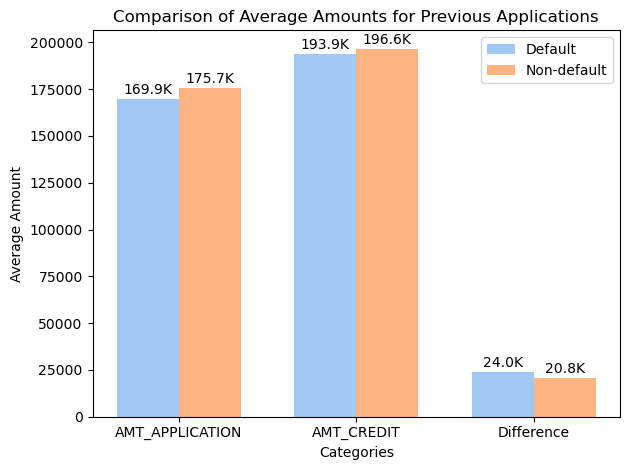

<IPython.core.display.Javascript object>

In [33]:
categories = ['AMT_APPLICATION', 'AMT_CREDIT', 'Difference']

default_values = [amt_apl_default.values[0], amt_crdt_default.values[0], diff_default.values[0]]
nondefault_values = [amt_apl_nondefault.values[0], amt_crdt_nondefault.values[0], diff_nondefault.values[0]]

colors = sns.color_palette("pastel", 2)
bar_width = 0.35
x = np.arange(len(categories))

fig, ax = plt.subplots()
bars_default = ax.bar(x - bar_width / 2, default_values, bar_width, label='Default', color=colors[0])
bars_nondefault = ax.bar(x + bar_width / 2, nondefault_values, bar_width, label='Non-default', color=colors[1])

ax.set_xlabel('Categories')
ax.set_ylabel('Average Amount')
ax.set_title('Comparison of Average Amounts for Previous Applications')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def format_label(num):
    if num >= 1e6:
        return f'{num/1e6:.1f}M'
    elif num >= 1e3:
        return f'{num/1e3:.1f}K'
    else:
        return str(num)

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        label = format_label(height)
        ax.annotate(label,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars_default)
add_value_labels(bars_nondefault)
plt.tight_layout()
plt.show()


For the amount applied for (AMT_APPLICATION), defaults are lower on average (169.9K) than non-defaults (175.7K). Conversely, the average credit amount approved (AMT_CREDIT) is slightly higher for defaults (193.9K) compared to non-defaults (196.6K). This might suggest that, on average, clients who default receive a larger proportion of the amount they applied for compared to those who do not default.

#### Average credit card balance before application date

In [35]:
mrg_ccbal_appl = credit_card_balance.merge(
    mrg_appl_bureau[["SK_ID_CURR", "TARGET"]], on="SK_ID_CURR"
)

<IPython.core.display.Javascript object>

In [36]:
balance_default = (
    mrg_ccbal_appl[["MONTHS_BALANCE", "AMT_BALANCE"]][mrg_ccbal_appl["TARGET"] == 1]
    .groupby("MONTHS_BALANCE")
    .sum()
    / mrg_ccbal_appl[["MONTHS_BALANCE", "AMT_BALANCE"]][mrg_ccbal_appl["TARGET"] == 1]
    .groupby("MONTHS_BALANCE")
    .count()
).reset_index()

balance_nondefault = (
    mrg_ccbal_appl[["MONTHS_BALANCE", "AMT_BALANCE"]][mrg_ccbal_appl["TARGET"] == 0]
    .groupby("MONTHS_BALANCE")
    .sum()
    / mrg_ccbal_appl[["MONTHS_BALANCE", "AMT_BALANCE"]][mrg_ccbal_appl["TARGET"] == 0]
    .groupby("MONTHS_BALANCE")
    .count()
).reset_index()

<IPython.core.display.Javascript object>

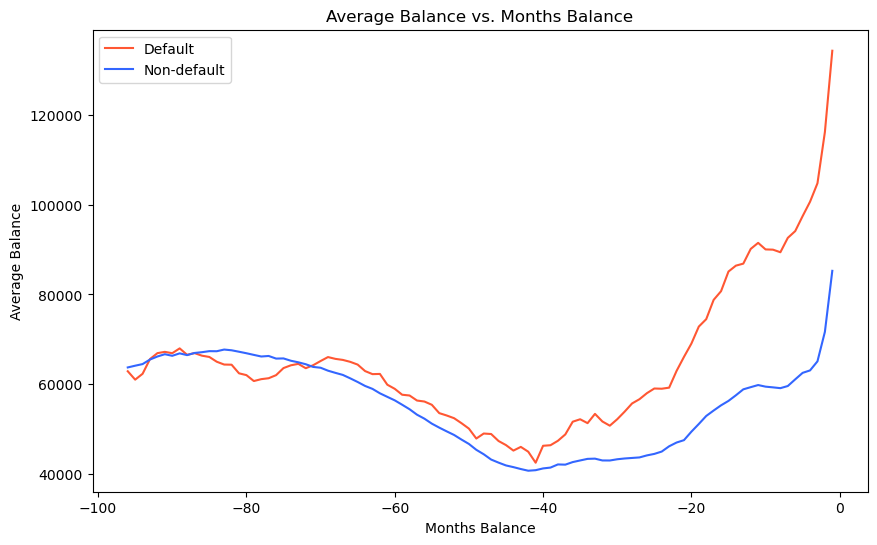

<IPython.core.display.Javascript object>

In [37]:
palette = ["#FF5733", "#3366FF"]
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=balance_default,
    x="MONTHS_BALANCE",
    y="AMT_BALANCE",
    color=palette[0],
    label="Default",
)
sns.lineplot(
    data=balance_nondefault,
    x="MONTHS_BALANCE",
    y="AMT_BALANCE",
    color=palette[1],
    label="Non-default",
)
plt.title("Average Balance vs. Months Balance")
plt.xlabel("Months Balance")
plt.ylabel("Average Balance")
plt.legend()
plt.show()

The trend for both groups appears similar, however after around 25th month, defaulters shows a sharper increase in credit card balance.